#Basic Linear Algebra for Deep Learning and Machine Learning Python Tutorial

URL: https://towardsai.net/p/machine-learning/basic-linear-algebra-for-deep-learning-and-machine-learning-ml-python-tutorial-444e23db3e9e

## Implementation of PCA from Scrach
*   Implement Covariance Matrix
*   Derive Eigenvalues and Eigenvectors
*   Analysis from Iris Dataset






In [ ]:
import numpy as np
import pylab as plt
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
load_iris = datasets.load_iris()
iris_df = pd.DataFrame(load_iris.data, columns=[load_iris.feature_names])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Check the Shape of Iris Dataset**

In [ ]:
load_iris.data.shape

(150, 4)

**Standardization**

It is always good to standardize the data to keep all feature of data on same scale.

In [ ]:
standardized_x = StandardScaler().fit_transform(load_iris.data)
standardized_x[:2]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ]])

In [ ]:
standardized_x.T

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

**Compute Covariance Matrix**

In [ ]:
covariance_matrix_x = np.cov(standardized_x.T)
covariance_matrix_x

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

**Compute Eigenvalues and Eigenvectors from Covariance Matrix**

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix_x)

In [ ]:
eigenvalues

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [ ]:
eigenvectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

**Check variance in Eigenvalues**

In [ ]:
total_of_eigenvalues = sum(eigenvalues)
varariance = [(i / total_of_eigenvalues)*100 for i in sorted(eigenvalues, reverse=True)]

varariance

[72.96244541329989, 22.850761786701753, 3.668921889282865, 0.5178709107154905]

**From the above result of variance**

*   1st Component = 72.96%
*   2nd Component = 22.85%
*   3rd Component = 3.5%
*   4th Component = 0.5%

So, here 3rd and 4th Components have very low variannce respectively. These can be dropped. Becasue these components can't add any value. 

**Taking 1st and 2nd Components only and Reshaping**





In [ ]:
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]

# Sorting from Higher values to lower value
eigenpairs.sort(key=lambda x: x[0], reverse=True)
eigenpairs

[(2.938085050199995,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.9201649041624864,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.1477418210449475,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462696,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [ ]:
matrix_weighing = np.hstack((eigenpairs[0][1].reshape(4,1),
                      eigenpairs[1][1].reshape(4,1)))
matrix_weighing

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [ ]:
Y = standardized_x.dot(matrix_weighing)
Y

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356],
       [-2.1663101 , -1.04369065],
       [-2.32613087, -0.13307834],
       [-2.2184509 ,  0.72867617],
       [-2.6331007 ,  0.96150673],
       [-2.1987406 , -1.86005711],
       [-2.26221453, -2.68628449],
       [-2.2075877 , -1.48360936],
       [-2.19034951, -0.48883832],
       [-1.898572  , -1.40501879],
       [-2.34336905, -1.12784938],
       [-1.914323  , -0.40885571],
       [-2.20701284, -0.92412143],
       [-2.7743447 , -0.45834367],
       [-1.81866953, -0.08555853],
       [-2.22716331, -0.13725446],
       [-1.95184633,  0.62561859],
       [-2.05115137, -0.24216355],
       [-2.16857717, -0.52714953],
       [-2.13956345,

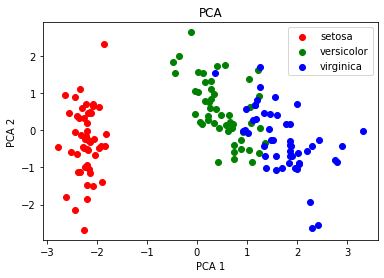

In [ ]:
plt.figure()
target_names = load_iris.target_names
y = load_iris.target
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(Y[y==i,0], Y[y==i,1], c=c, label=target_name)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.title('PCA')
plt.show()


##Prediction of House Price by using Linear Regression (Linear Equation)
* To understand the usage of Linear Algebra in Linear Regression
* Linear Equation in Linear Regression
* Load Training data of House Price
* Training data of house has only two variables - square_feet, price

In [ ]:
#Download the dataset
!wget https://raw.githubusercontent.com/towardsai/tutorials/master/linear-algebra-for-ml-and-deep-learning/house_price.csv

import pandas as pd
import numpy as np

df = pd.read_csv('house_price.csv')

df.head()

--2020-10-19 23:28:18--  https://raw.githubusercontent.com/towardsai/tutorials/master/linear-algebra-for-ml-and-deep-learning/house_price.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84 [text/plain]
Saving to: ‘house_price.csv.2’

house_price.csv.2   100%[===================>]      84  --.-KB/s    in 0s      

2020-10-19 23:28:18 (8.01 MB/s) - ‘house_price.csv.2’ saved [84/84]



,square_feet,price
0,150,6450
1,200,7450
2,250,8450
3,300,9450
4,350,11450


**Calculating the Mean**

In [ ]:
def get_mean(value):
    total = sum(value)
    length = len(value)
    mean = total/length
    return mean 

**Calculating the Variance**

In [ ]:
def get_variance(value):
    mean = get_mean(value)
    mean_difference_square = [pow((item - mean), 2) for item in value]
    variance = sum(mean_difference_square)/float(len(value)-1)
    return variance

**Calculating the Covariance**

In [ ]:
def get_covariance(value1, value2):
    value1_mean = get_mean(value1)
    value2_mean = get_mean(value2)
    values_size = len(value1)
    covariance = 0.0
    for i in range(0, values_size):
        covariance += (value1[i] - value1_mean) * (value2[i] - value2_mean)
        
    return covariance / float(values_size - 1)

**Implementing a Linear Regression**

In [ ]:
def linear_regression(df):

    X = df['square_feet']
    Y = df['price']
    m = len(X)

    square_feet_mean = get_mean(X)
    price_mean = get_mean(Y)
    
    #variance of X
    square_feet_variance = get_variance(X)
    price_variance = get_variance(Y)
    
    covariance_of_price_and_square_feet = get_covariance(X, Y)
    w1 = covariance_of_price_and_square_feet / float(square_feet_variance)
    w0 = price_mean - w1 * square_feet_mean
    
    # prediction --> Linear Equation
    prediction = w0 + w1 * X
    
    df['price (prediction)'] = prediction
    return df['price (prediction)']

**Calling the Linear Regression Method**

In [ ]:
linear_regression(df)

0     6088.297872
1     7527.127660
2     8965.957447
3    10404.787234
4    11843.617021
5    13282.446809
6    19037.765957
Name: price (prediction), dtype: float64